In [1]:
# resizable output for notebook
%matplotlib notebook

# for jupyterlab or notebook
# %matplotlib widget

import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('fivethirtyeight')
import pandas as pd
import numpy as np

Pandas can visualize data in a nicely-formatted HTML table or in many different types of plots.  Using it in a GUI simply required that have the visualization in a dynamically-updated widget.  For example, the HTML widget from ipywidgets and the matplotlib notebook widget.  For details, step through the cells below.

# Pandas Tables

Let's create a dataframe and display it.

In [2]:
df = pd.DataFrame(np.random.randn(6,4), index=range(6), columns=list('ABCD'))
df

,A,B,C,D
0,-0.324731,-0.387793,-2.159543,1.172994
1,-0.151650,-0.032550,0.343608,1.413767
2,-1.052251,-1.743107,-1.462805,0.992874
3,-0.544446,-0.606778,0.805516,-1.361003
4,-1.153822,0.455584,0.722234,-0.907964
5,0.314648,-1.108840,0.004920,-0.000080


Now what if we want to update that table because the data changed?  Changing df will not update the above table.  We need to create an HTML widget and display the table in it.

In [3]:
wh = widgets.HTML(value=df.to_html(classes='rendered_html'))

OR we can display the dataframe in an Output widget.

In [4]:
out = widgets.Output(layout={'border': '2px solid red'})
with out:
    display(df)
widgets.HBox([wh, out])

Now run the next two cells and watch the above widget update.

In [5]:
# update the dataframe
df = pd.DataFrame(np.random.randn(6,4), index=range(6), columns=list('ABCD'))

# update the HTML widget
wh.value = df.to_html(classes='rendered_html')

# update the Output widget
with out:
    clear_output()
    display(df)

# Pandas Plots

They just use matplotlib and work like all matplotlib plots, but we will demonstrate...

<IPython.core.display.Javascript object>


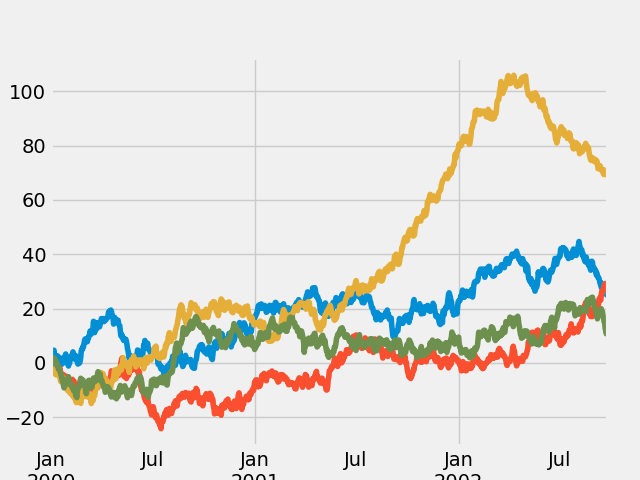

In [6]:
plt.figure('Pandas Series Plot')
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot();

In [7]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot();

Why did the second plot get added to the first one?  If you had used **%matplotlib inline** it would not have.  But the notebook mode for matplotlib behaves differently. We have to call **plt.figure()** if we want to create a new plot.

In [8]:
plt.figure('Pandas Series Plot')
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot();

That didn't work because we used the same figure name.  Create a *NEW* figure by giving it a new name...

<IPython.core.display.Javascript object>


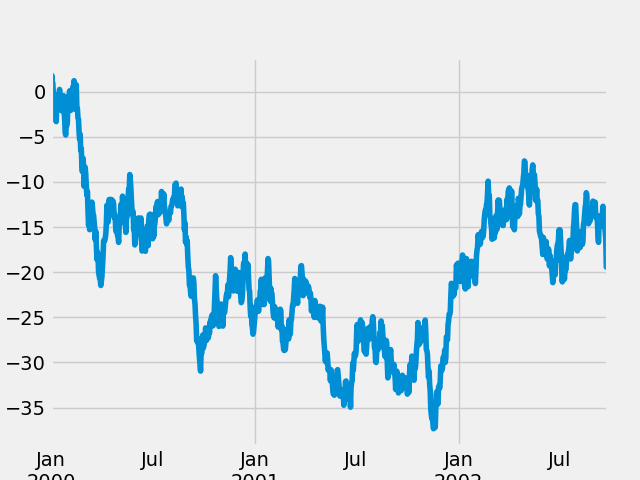

In [9]:
plt.figure('Pandas Series Plot2')
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot();

And this will add a fourth line to the first plot.

In [10]:
plt.figure('Pandas Series Plot')
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot();

Finally, what if we wanted to replace the contents of the second plot?  Just call **plt.clf()** to clear it.

In [11]:
plt.figure('Pandas Series Plot2')
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
plt.clf()
ts.plot();